In [1]:
from temds import tile
from osgeo import ogr
import geopandas as gpd
import numpy as np
import rioxarray as rio
from temds.datasources import worldclim
from temds.datasources import crujra
import xarray as xr

from pathlib import Path

from affine import Affine

from temds import downscalers
from temds import corrections

import matplotlib.pyplot as plt


In [37]:
tile_index.crs.to_proj4()

/home/rwspicer/miniconda3/envs/temds/lib/python3.11/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


'+proj=laea +lat_0=90 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs'

In [36]:
tile_index.set_crs(tile_index.crs.to_proj4())

/home/rwspicer/miniconda3/envs/temds/lib/python3.11/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


,location,H,V,geometry
0,working/tiles/H05_V05/EPSG_6931.tiff,5,5,"POLYGON ((-2602000 -1085000, -2222000 -1085000..."
1,working/tiles/H09_V15/EPSG_6931.tiff,9,15,"POLYGON ((-1002000 2915000, -602000 2915000, -..."
2,working/tiles/H05_V02/EPSG_6931.tiff,5,2,"POLYGON ((-2350000 -2285000, -2202000 -2285000..."
3,working/tiles/H21_V12/EPSG_6931.tiff,21,12,"POLYGON ((3798000 1715000, 4198000 1715000, 41..."
4,working/tiles/H06_V03/EPSG_6931.tiff,6,3,"POLYGON ((-2202000 -1885000, -1802000 -1885000..."
...,...,...,...,...
292,working/tiles/H08_V02/EPSG_6931.tiff,8,2,"POLYGON ((-1138000 -2397000, -1002000 -2397000..."
293,working/tiles/H04_V15/EPSG_6931.tiff,4,15,"POLYGON ((-2938000 2643000, -2602000 2643000, ..."
294,working/tiles/H10_V15/EPSG_6931.tiff,10,15,"POLYGON ((-602000 2915000, -202000 2915000, -2..."
295,working/tiles/H20_V05/EPSG_6931.tiff,20,5,"POLYGON ((3398000 -1085000, 3474000 -1085000, ..."


In [19]:
start_year = 1970
end_year = 2001
c_tile = (7, 16)
tile_index = gpd.read_file('/media/rwspicer/data/V3/tem/00-aoi/tile-index/')
hdx = tile_index['H'] == c_tile[0]
vdx = tile_index['V'] == c_tile[1]
bounds = tile_index[vdx & hdx].bounds
minx, maxx, miny, maxy = bounds[['minx','maxx','miny','maxy']].iloc[0]
minx, maxx, miny, maxy

(-1678000.0, -1402000.0, 2915000.0, 3315000.0)

In [3]:
wc_arctic = worldclim.WorldClim('/media/rwspicer/data/V3/tem/02-arctic/worldclim/worldclim-arctic.nc')

In [4]:
wc_test = xr.open_dataset('/media/rwspicer/data/V3/tem/02-arctic/worldclim/worldclim-arctic.nc')

In [5]:
wc_arctic.dataset.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / NSIDC EASE-Grid 2.0 North",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",90],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",SOUTH],AXIS["Northing",SOUTH],AUTHORITY["EPSG","6931"]]')

In [6]:

annual_list = []
for cru_file in list(Path('/media/rwspicer/data/V3/tem/02-arctic/cru-jra/').glob('*.nc')):
    year = int(cru_file.name.split('.')[-4])
    if year < start_year or year > end_year:
        continue

    temp = crujra.AnnualDaily(year, cru_file, verbose=False, force_aoi_to='tmax', aoi_nodata=np.nan)
    # temp.reproject(tile_index.crs.to_wkt())
    annual_list.append(temp)

annual_list[:5]

parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent


[temds.datasources.crujra.AnnualDaily: 1996,
 temds.datasources.crujra.AnnualDaily: 1985,
 temds.datasources.crujra.AnnualDaily: 1998,
 temds.datasources.crujra.AnnualDaily: 1997,
 temds.datasources.crujra.AnnualDaily: 1975]

In [7]:
cru_arctic_ts = crujra.AnnualTimeSeries(annual_list)
# [i for i in cru_arctic_ts[1970].dataset.data_vars]

<class 'list'>
Checking Continuity (basic)
Data is continuous
Checking Continuity (advanced)
-- Checking 1970
-- Checking 1971
-- Checking 1972
-- Checking 1973
-- Checking 1974
-- Checking 1975
-- Checking 1976
-- Checking 1977
-- Checking 1978
-- Checking 1979
-- Checking 1980
-- Checking 1981
-- Checking 1982
-- Checking 1983
-- Checking 1984
-- Checking 1985
-- Checking 1986
-- Checking 1987
-- Checking 1988
-- Checking 1989
-- Checking 1990
-- Checking 1991
-- Checking 1992
-- Checking 1993
-- Checking 1994
-- Checking 1995
-- Checking 1996
-- Checking 1997
-- Checking 1998
-- Checking 1999
-- Checking 2000
-- Checking 2001
Data is continuous


In [8]:
cru_arctic_ts

temds.datasources.crujra.AnnualTimeSeries
-temds.datasources.crujra.AnnualDaily: 1970
-temds.datasources.crujra.AnnualDaily: 1971
-temds.datasources.crujra.AnnualDaily: 1972
-temds.datasources.crujra.AnnualDaily: 1973
-temds.datasources.crujra.AnnualDaily: 1974
-temds.datasources.crujra.AnnualDaily: 1975
-temds.datasources.crujra.AnnualDaily: 1976
-temds.datasources.crujra.AnnualDaily: 1977
-temds.datasources.crujra.AnnualDaily: 1978
-temds.datasources.crujra.AnnualDaily: 1979
-temds.datasources.crujra.AnnualDaily: 1980
-temds.datasources.crujra.AnnualDaily: 1981
-temds.datasources.crujra.AnnualDaily: 1982
-temds.datasources.crujra.AnnualDaily: 1983
-temds.datasources.crujra.AnnualDaily: 1984
-temds.datasources.crujra.AnnualDaily: 1985
-temds.datasources.crujra.AnnualDaily: 1986
-temds.datasources.crujra.AnnualDaily: 1987
-temds.datasources.crujra.AnnualDaily: 1988
-temds.datasources.crujra.AnnualDaily: 1989
-temds.datasources.crujra.AnnualDaily: 1990
-temds.datasources.crujra.AnnualDa

In [9]:
# cru_arctic_ts[1970].dataset['pre'].values[np.isnan(cru_arctic_ts[1970].dataset['tmax'].values)]=np.nan

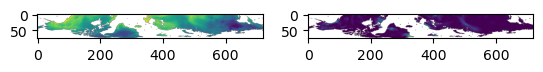

In [10]:
fix, axes = plt.subplots(1,2)
axes[0].imshow(cru_arctic_ts[1970].dataset['tmax'][0])
axes[1].imshow(cru_arctic_ts[1970].dataset['pre'][0])

# plt.imshow(cru_arctic_ts[1970].dataset['pre'][0])
# plt.colorbar()

In [11]:
cru_arctic_ts[1970:1975]

<class 'list'>
Checking Continuity (basic)
Data is continuous
Checking Continuity (advanced)
-- Checking 1970
-- Checking 1971
-- Checking 1972
-- Checking 1973
-- Checking 1974
Data is continuous


temds.datasources.crujra.AnnualTimeSeries
-temds.datasources.crujra.AnnualDaily: 1970
-temds.datasources.crujra.AnnualDaily: 1971
-temds.datasources.crujra.AnnualDaily: 1972
-temds.datasources.crujra.AnnualDaily: 1973
-temds.datasources.crujra.AnnualDaily: 1974

In [12]:
mytile = tile.Tile(c_tile, bounds, 4000, tile_index.crs.to_wkt(), buffer_px=20)

In [13]:
mytile.import_normalized('worldclim', wc_arctic, flip_y = True)

# wc = mytile.data['worldclim'].rename({'lat':'y', 'lon':'x'})
# wc = wc.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)\
#                      .rio.write_crs(tile_index.crs.to_wkt(),inplace=True)\
#                      .rio.write_coordinate_system(inplace=True) 
# wc = wc.reindex(y=list(reversed(wc.y)))
# mytile.data['worldclim'] = wc
mytile.data['worldclim'] 

res 4000
ll


<xarray.Dataset> Size: 5MB
Dimensions:      (y: 140, x: 109, time: 12)
Coordinates:
  * y            (y) float64 1kB 3.393e+06 3.389e+06 ... 2.841e+06 2.837e+06
  * x            (x) float64 872B -1.756e+06 -1.752e+06 ... -1.324e+06
  * time         (time) int64 96B 1 32 60 91 121 152 182 213 244 274 305 335
    spatial_ref  int64 8B 0
Data variables:
    tmin         (time, y, x) float32 732kB nan nan nan ... -18.87 -18.42 -18.54
    tmax         (time, y, x) float32 732kB nan nan nan ... -9.662 -9.476 -9.704
    tavg         (time, y, x) float32 732kB nan nan nan ... -14.28 -13.95 -14.13
    prec         (time, y, x) float32 732kB nan nan nan ... 27.16 27.62 27.98
    srad         (time, y, x) float32 732kB nan nan nan ... 465.8 458.0 454.9
    wind         (time, y, x) float32 732kB nan nan nan ... 2.561 2.569 2.532
    vapr         (time, y, x) float32 732kB nan nan nan ... 0.1626 0.1543 0.1539

Text(0.5, 1.0, 'wc example')

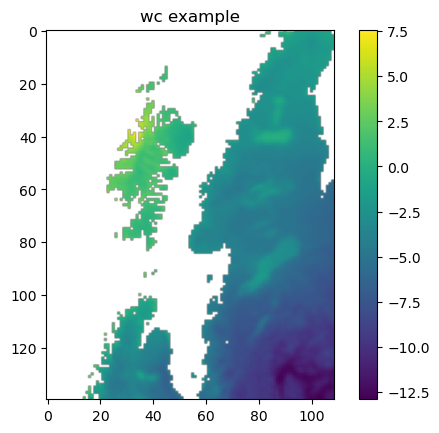

In [14]:
fig, axes= plt.subplots (1,1, dpi=100)

im = axes.imshow(mytile.data['worldclim']['tmax'].data[0])
fig.colorbar(im, ax=axes)
axes.set_title('wc example')


In [15]:
mytile.import_normalized('cru_AnnualTimeSeries', cru_arctic_ts)

res 4000
temds.datasources.crujra.AnnualDaily: 1970 clipping
parent
temds.datasources.crujra.AnnualDaily: 1971 clipping
parent
temds.datasources.crujra.AnnualDaily: 1972 clipping
parent
temds.datasources.crujra.AnnualDaily: 1973 clipping
parent
temds.datasources.crujra.AnnualDaily: 1974 clipping
parent
temds.datasources.crujra.AnnualDaily: 1975 clipping
parent
temds.datasources.crujra.AnnualDaily: 1976 clipping
parent
temds.datasources.crujra.AnnualDaily: 1977 clipping
parent
temds.datasources.crujra.AnnualDaily: 1978 clipping
parent
temds.datasources.crujra.AnnualDaily: 1979 clipping
parent
temds.datasources.crujra.AnnualDaily: 1980 clipping
parent
temds.datasources.crujra.AnnualDaily: 1981 clipping
parent
temds.datasources.crujra.AnnualDaily: 1982 clipping
parent
temds.datasources.crujra.AnnualDaily: 1983 clipping
parent
temds.datasources.crujra.AnnualDaily: 1984 clipping
parent
temds.datasources.crujra.AnnualDaily: 1985 clipping
parent
temds.datasources.crujra.AnnualDaily: 1986 clip

In [17]:
cru_arctic_ts[1970].dataset

<xarray.Dataset> Size: 719MB
Dimensions:      (time: 365, lat: 76, lon: 720)
Coordinates:
  * lon          (lon) float64 6kB -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * lat          (lat) float64 608B 45.75 46.25 46.75 ... 82.25 82.75 83.25
  * time         (time) object 3kB 1970-01-01 00:00:00 ... 1970-12-31 00:00:00
    spatial_ref  int64 8B 0
Data variables:
    tmin         (time, lat, lon) float32 80MB nan nan nan nan ... nan nan nan
    tmax         (time, lat, lon) float32 80MB nan nan nan nan ... nan nan nan
    tmp          (time, lat, lon) float32 80MB nan nan nan nan ... nan nan nan
    pre          (time, lat, lon) float32 80MB nan nan nan nan ... nan nan nan
    dswrf        (time, lat, lon) float32 80MB nan nan nan nan ... nan nan nan
    ugrd         (time, lat, lon) float32 80MB nan nan nan nan ... nan nan nan
    vgrd         (time, lat, lon) float32 80MB nan nan nan nan ... nan nan nan
    spfh         (time, lat, lon) float32 80MB nan nan nan nan ... nan nan nan
    pres         (time, lat, lon) float32 80MB nan nan nan nan ... nan nan nan
Attributes:
    CDI:              Climate Data Interface version 1.9.9 (https://mpimet.mp...
    Conventions:      CF-1.4
    source:           Data is provided from the Japanese 55-year Reanalysis (...
    institution:      Produced at the Climatic Research Unit, UEA, Norwich UK
    title:            CRUJRA TMIN: a forcing dataset based on CRU TS v4.08 an...
    version_control:  V2.5: Update to 2026 with partial alignment to CRU TS v...
    history:          Sat Jun 29 02:26:42 2024: cdo -L -s copy /media/f098/bi...
    references:       Contact i.harris@uea.ac.uk with any questions
    comment:          JRA-55 regridded to CRU 0.5 grid and aligned with CRU T...
    contact:          i.harris@uea.ac.uk
    CDO:              Climate Data Operators version 1.9.9 (https://mpimet.mp...

In [20]:
mytile.data['cru_AnnualTimeSeries']

for year in range(start_year,end_year+1):
    mytile.data['cru_AnnualTimeSeries'][year].dataset['x'] = mytile.data['worldclim'].x
    mytile.data['cru_AnnualTimeSeries'][year].dataset['y'] = mytile.data['worldclim'].y





In [21]:
# from temds import crujra
# from importlib import reload
# reload(crujra)
mytile.calculate_climate_baseline(1970, 1975, 'cru_baseline', 'cru_AnnualTimeSeries')
mytile.data['cru_baseline']




creating baseline for tmin with mean
creating baseline for tmax with mean
creating baseline for tmp with mean
creating baseline for pre with sum
creating baseline for dswrf with sum
creating baseline for ugrd with mean
creating baseline for vgrd with mean
creating baseline for spfh with mean
creating baseline for pres with mean


<xarray.Dataset> Size: 7MB
Dimensions:      (time: 12, y: 140, x: 109)
Coordinates:
  * x            (x) float64 872B -1.756e+06 -1.752e+06 ... -1.324e+06
  * y            (y) float64 1kB 3.393e+06 3.389e+06 ... 2.841e+06 2.837e+06
  * time         (time) int64 96B 1 32 60 91 121 152 182 213 244 274 305 335
    spatial_ref  int64 8B 0
Data variables:
    tmin         (time, y, x) float32 732kB nan nan nan ... 255.5 255.4 255.3
    tmax         (time, y, x) float32 732kB nan nan nan ... 261.2 261.2 261.1
    tmp          (time, y, x) float32 732kB nan nan nan ... 255.8 255.7 255.6
    pre          (time, y, x) float32 732kB nan nan nan ... 29.47 29.51 29.52
    dswrf        (time, y, x) float32 732kB nan nan nan ... 2.163e+07 2.154e+07
    ugrd         (time, y, x) float32 732kB nan nan nan ... -0.2943 -0.2177
    vgrd         (time, y, x) float32 732kB nan nan nan ... -0.248 -0.3089
    spfh         (time, y, x) float32 732kB nan nan nan ... 0.0006335 0.0006285
    pres         (time, y, x) float32 732kB nan nan nan ... 9.468e+04 9.503e+04

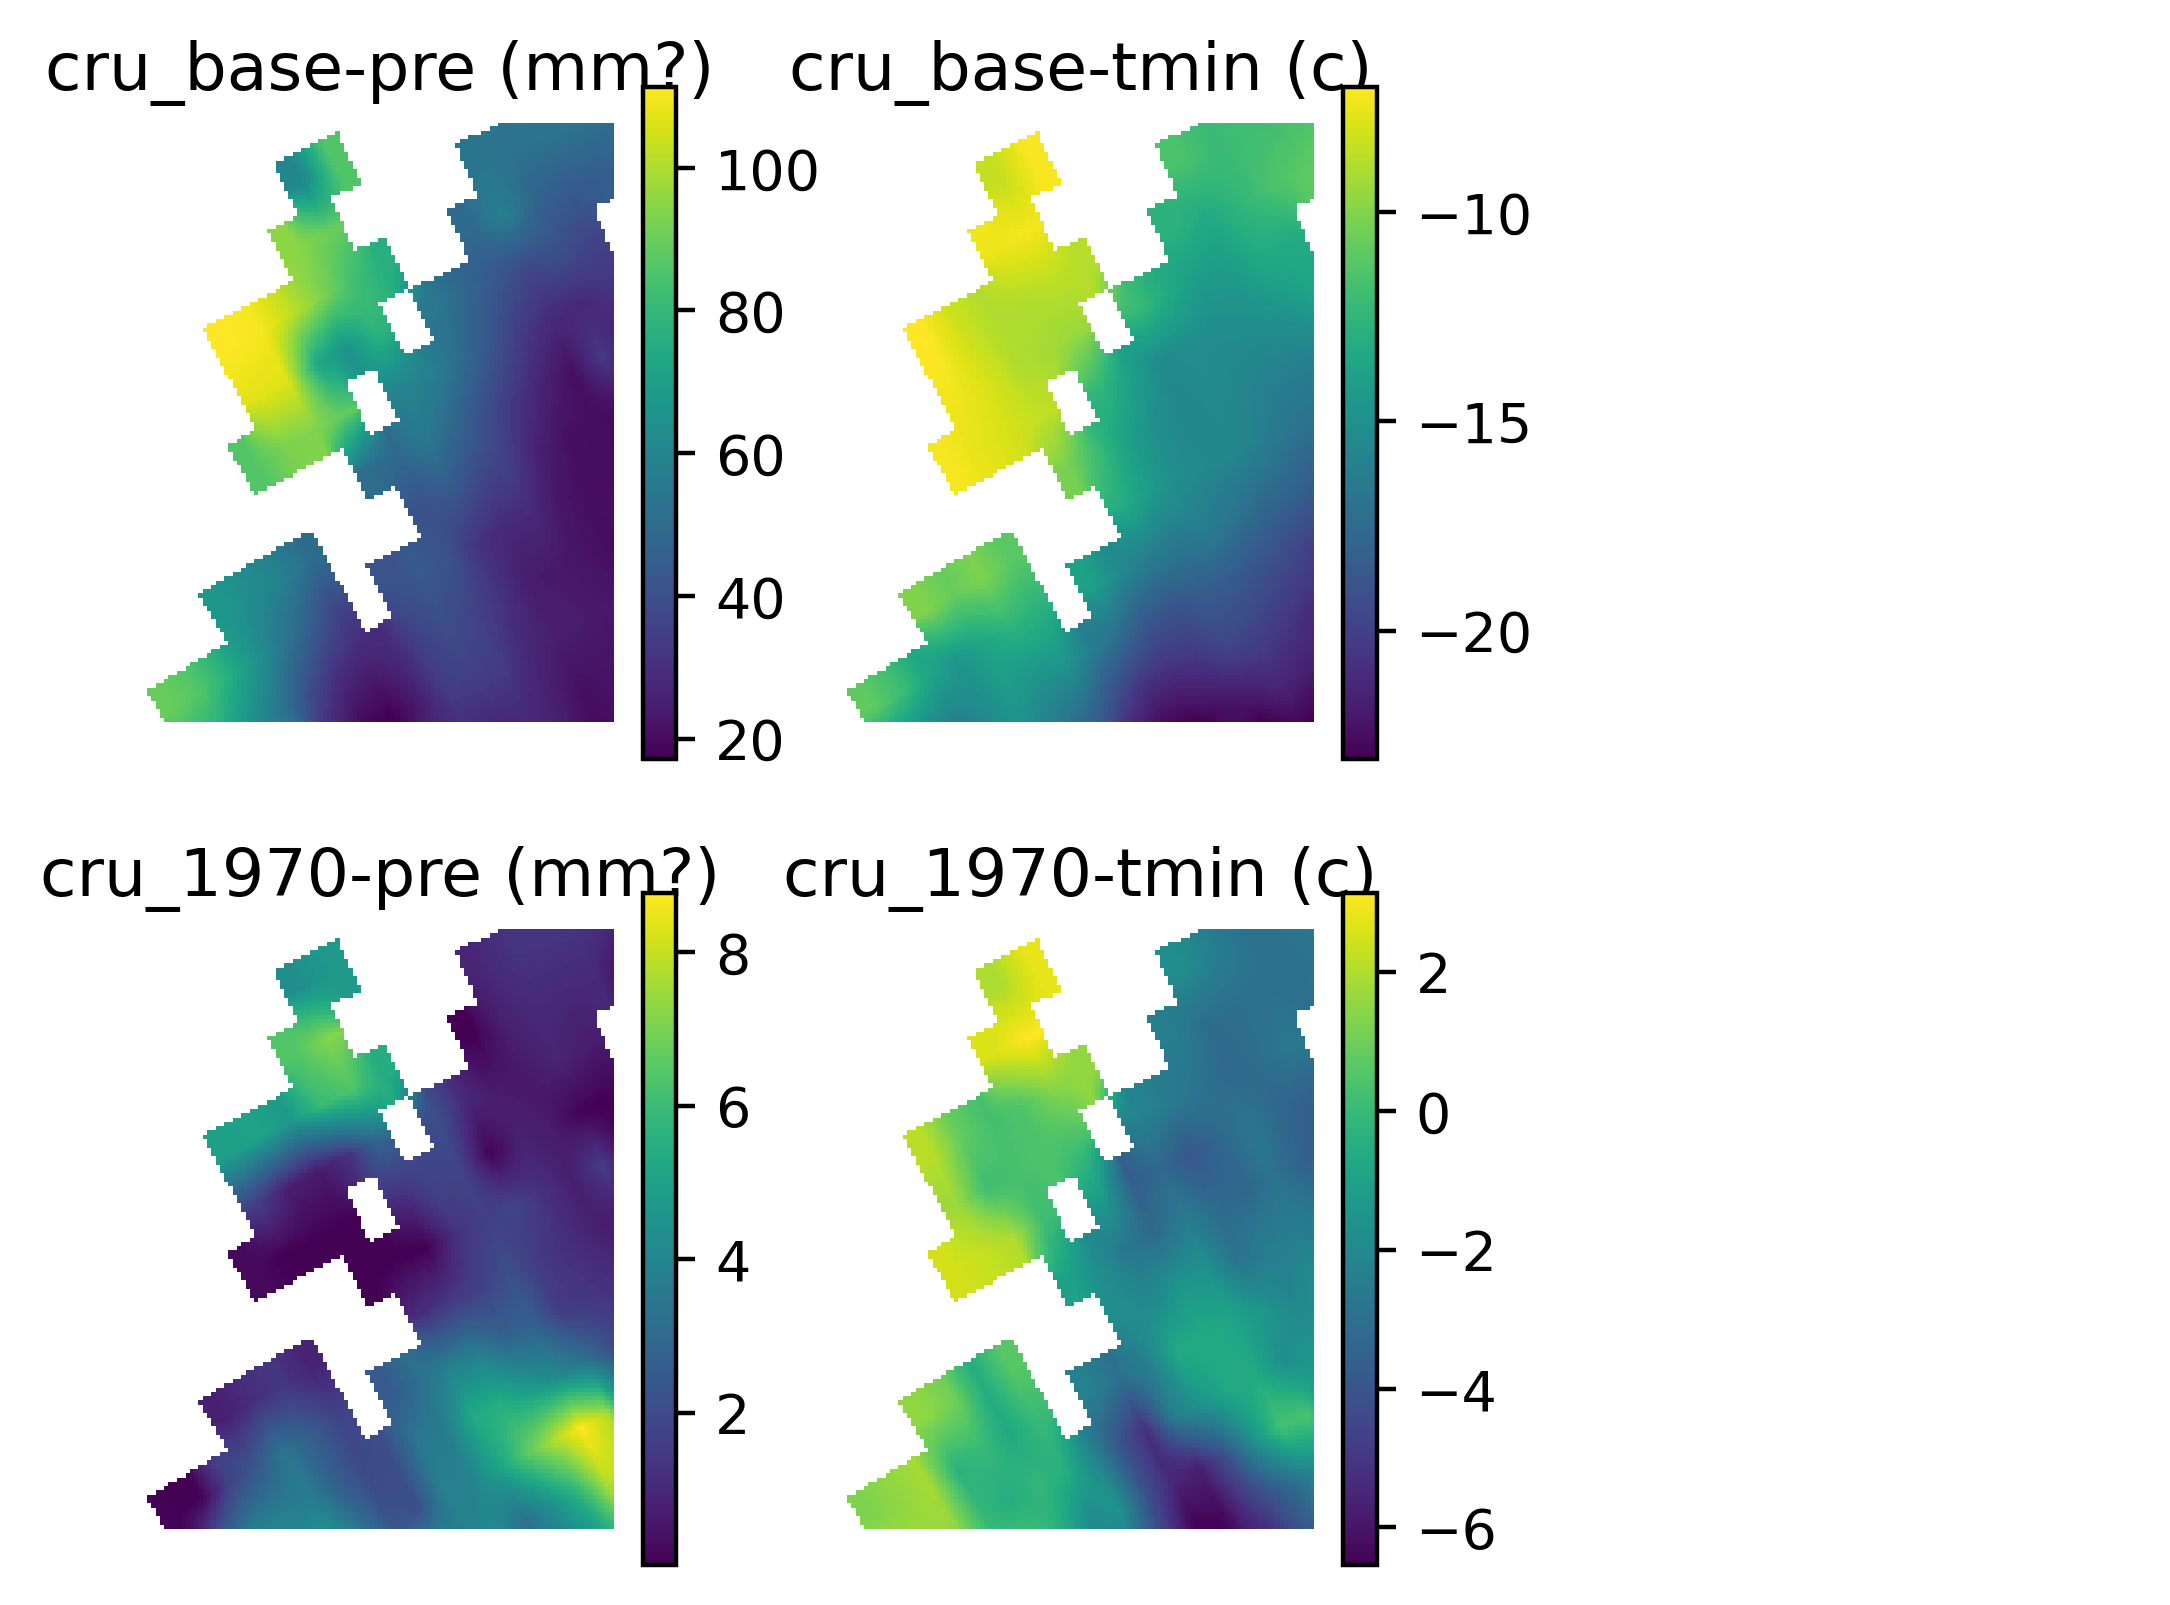

In [22]:
# img = mytile.data['cru_AnnualTimeSeries'][1970].dataset['tmax'].data[0]
# img = mytile.data['cru_baseline']['pre'].data[0]
# # img = mytile.data['worldclim']['tmax'].data[0]

# plt.imshow(img)
# plt.colorbar()
fig, axes= plt.subplots (2,3, dpi=400)

im = axes[0][0].imshow(mytile.data['cru_baseline']['pre'].data[0])
fig.colorbar(im, ax=axes[0][0])
axes[0][0].set_title('cru_base-pre (mm?)')

im = axes[0][1].imshow(mytile.data['cru_baseline']['tmin'].data[0] - downscalers.ZERO_C_IN_K)
fig.colorbar(im, ax=axes[0][1])
axes[0][1].set_title('cru_base-tmin (c)')

im = axes[1][0].imshow(mytile.data['cru_AnnualTimeSeries'][1970].dataset['pre'].data[0])
fig.colorbar(im, ax=axes[1][0])
axes[1][0].set_title('cru_1970-pre (mm?)')

im = axes[1][1].imshow(mytile.data['cru_AnnualTimeSeries'][1970].dataset['tmax'].data[0] - downscalers.ZERO_C_IN_K)
fig.colorbar(im, ax=axes[1][1])
axes[1][1].set_title('cru_1970-tmin (c)')


for xx in range(2):
    for yy in range(3):
        axes[xx][yy].axis('off')

plt.show()

In [23]:
mytile.data['cru_baseline']['pre'].data[0]

array([[      nan,       nan,       nan, ..., 51.13094 , 50.88009 ,
        50.645832],
       [      nan,       nan,       nan, ..., 50.7177  , 50.48644 ,
        50.271812],
       [      nan,       nan,       nan, ..., 50.28697 , 50.07533 ,
        49.88036 ],
       ...,
       [      nan,       nan,       nan, ..., 20.705006, 20.954634,
        21.225   ],
       [      nan,       nan,       nan, ..., 20.46564 , 20.734814,
        21.024763],
       [      nan,       nan,       nan, ..., 20.20419 , 20.492922,
        20.802477]], shape=(140, 109), dtype=float32)

In [24]:
# mytile.save('/media/rwspicer/data/V3/tem/03-tiles-testing', overwrite=True)

tmin
tmax
tavg
prec
srad
wind
vapr
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pres
tmin
tmax
tmp
pre
dswrf
ugrd
vgrd
spfh
pr

In [25]:
from temds.datasources.annual import AnnualTimeSeries
isinstance(mytile.data['cru_AnnualTimeSeries'], AnnualTimeSeries)
# type() is 

True

In [26]:
variables = {
    'tmax': {'function': 'temperature', 'reference': 'tmax','baseline':'tmax', 'name': 'tmax'},
    'tmin': {'function': 'temperature', 'reference': 'tmin','baseline':'tmin', 'name': 'tmin'},
    'tavg': {'function': 'temperature', 'reference': 'tavg','baseline':'tmp', 'name': 'tavg'},
    'prec': {'function': 'precipitation', 'reference': 'prec','baseline':'pre', 'name': 'prec'},

    'vapo_pa': {
        'function': 'vapor-pressure', 
        'reference-vapor': 'vapr',
        'baseline-pres':'pres', 
        'baseline-spfh': 'spfh',
        'name': 'vapo'
        },
    'nirr': {
        'function': 'radiation', 
        'reference': 'srad',
        'baseline':'dswrf', 
        'name': 'nirr'
        
    },
    'ws': {
        'function': 'wind-speed', 
        'reference': 'wind',
        'baseline-ugrd': 'ugrd', 
        'baseline-vgrd': 'vgrd', 
        'name': 'ws'
        
    }
}


mytile.calculate_correction_factors('cru_baseline', 'worldclim', variables)

KeyError: 'srad'

In [29]:
mytile.data['correction_factors']#['tmax']


<xarray.Dataset> Size: 5MB
Dimensions:      (y: 140, x: 109, time: 12)
Coordinates:
  * y            (y) float64 1kB 3.393e+06 3.389e+06 ... 2.841e+06 2.837e+06
  * x            (x) float64 872B -1.756e+06 -1.752e+06 ... -1.324e+06
  * time         (time) int64 96B 1 32 60 91 121 152 182 213 244 274 305 335
    spatial_ref  int64 8B 0
Data variables:
    tmax         (time, y, x) float32 732kB nan nan nan nan ... 11.03 11.11 11.2
    tmin         (time, y, x) float32 732kB nan nan nan nan ... 16.14 16.2 16.27
    tavg         (time, y, x) float32 732kB nan nan nan ... 15.54 15.63 15.73
    prec         (time, y, x) float32 732kB nan nan nan ... 0.005245 0.00525
    vapo         (time, y, x) float32 732kB nan nan nan ... 1.335 1.281 1.292
    nirr         (time, y, x) float32 732kB nan nan nan ... 7.133e-09 7.147e-09
    ws           (time, y, x) float32 732kB nan nan nan ... 0.3391 0.6338 nan

In [26]:
# variables = {
#     'tmax': {'function': 'temperature', 'temperature': 'tmax','correction_factor':'tmax', 'name': 'tmax'},
#     'tmin': {'function': 'temperature', 'temperature': 'tmin','correction_factor':'tmin', 'name': 'tmin'},
#     'tavg': {'function': 'temperature', 'temperature': 'tmp','correction_factor':'tavg', 'name': 'tavg'},
#     'prec': {'function': 'precipitation', 'precipitation': 'pre','correction_factor':'prec', 'name': 'prec'},
# }

# year = 1970

# self = mytile
# source_id, correction_id ='cru_AnnualTimeSeries','correction_factors'

# correction = self.data[correction_id]
# source = self.data[source_id][year].dataset
# temp = []
# for var, info in variables.items():
#     func = downscalers.LOOKUP[info['function']]
#     current = func(source, correction, info)
#     current.name = info['name']
#     temp.append(current)
   
# downscaled = xr.merge(temp)
# downscaled


In [27]:
from importlib import reload

from temds import annual
reload(annual)
from temds import downscaled
reload(downscaled)

<module 'temds.downscaled' from '/home/rwspicer/Desktop/tem/Input_production/src/temds/downscaled.py'>

In [30]:
variables = {
    'tmax': {'function': 'temperature', 'temperature': 'tmax','correction_factor':'tmax', 'name': 'tmax'},
    'tmin': {'function': 'temperature', 'temperature': 'tmin','correction_factor':'tmin', 'name': 'tmin'},
    'tavg': {'function': 'temperature', 'temperature': 'tmp','correction_factor':'tavg', 'name': 'tavg'},
    'prec': {'function': 'precipitation', 'precipitation': 'pre','correction_factor':'prec', 'name': 'prec'},
    'vapo': {'function': 'vapor-pressure', 'name': 'vapo', 'pres':'pres', 'spfh':'spfh', 'correction_factor': 'vapo' },
    'nirr': {'function':'radiation', 'name': 'nirr', 'dswrf':'dswrf','correction_factor': 'nirr'},
    'wind': {'function':'wind-speed', 'name': 'wind', 'ugrd': 'ugrd', 'vgrd':'vgrd', 'correction_factor':'ws'},
    'winddir': {'function':'wind-direction', 'name': 'winddir', 'ugrd': 'ugrd', 'vgrd':'vgrd' },
}
year = 1970
downscaled_list = []
for year in range(1970,1981):
    downscaled_list.append(
        downscaled.AnnualDaily(
            year, 
            mytile.downscale_year(
                year, 'cru_AnnualTimeSeries','correction_factors', variables
            )
        )
    )

parent
parent
parent
parent
parent
parent
parent
parent
parent
parent
parent


In [31]:
mytile.data.keys()

dict_keys(['worldclim', 'cru_AnnualTimeSeries', 'cru_baseline', 'correction_factors'])

In [32]:
downscaled_data = downscaled.AnnualTimeSeries(downscaled_list)

<class 'list'>
Checking Continuity (basic)
Data is continuous
Checking Continuity (advanced)
-- Checking 1970
-- Checking 1971
-- Checking 1972
-- Checking 1973
-- Checking 1974
-- Checking 1975
-- Checking 1976
-- Checking 1977
-- Checking 1978
-- Checking 1979
-- Checking 1980
Data is continuous


In [33]:
downscaled_data[1970].dataset

<xarray.Dataset> Size: 178MB
Dimensions:      (x: 109, y: 140, time: 365)
Coordinates:
  * x            (x) float64 872B -1.756e+06 -1.752e+06 ... -1.324e+06
  * y            (y) float64 1kB 3.393e+06 3.389e+06 ... 2.841e+06 2.837e+06
  * time         (time) object 3kB 1970-01-01 00:00:00 ... 1970-12-31 00:00:00
    spatial_ref  int64 8B 0
Data variables:
    tmax         (time, y, x) float32 22MB nan nan nan ... -9.034 -8.965 -8.886
    tmin         (time, y, x) float32 22MB nan nan nan ... -12.24 -12.16 -12.08
    tavg         (time, y, x) float32 22MB nan nan nan ... -11.89 -11.84 -11.79
    prec         (time, y, x) float32 22MB nan nan nan ... 2.325e-05 2.772e-05
    vapo         (time, y, x) float32 22MB nan nan nan nan ... 20.55 19.86 20.21
    nirr         (time, y, x) float32 22MB nan nan nan ... 2.484e-07 2.493e-07
    wind         (time, y, x) float32 22MB nan nan nan nan ... 0.533 0.9196 nan
    winddir      (time, y, x) float32 22MB nan nan nan ... -72.6 -73.25 -74.16

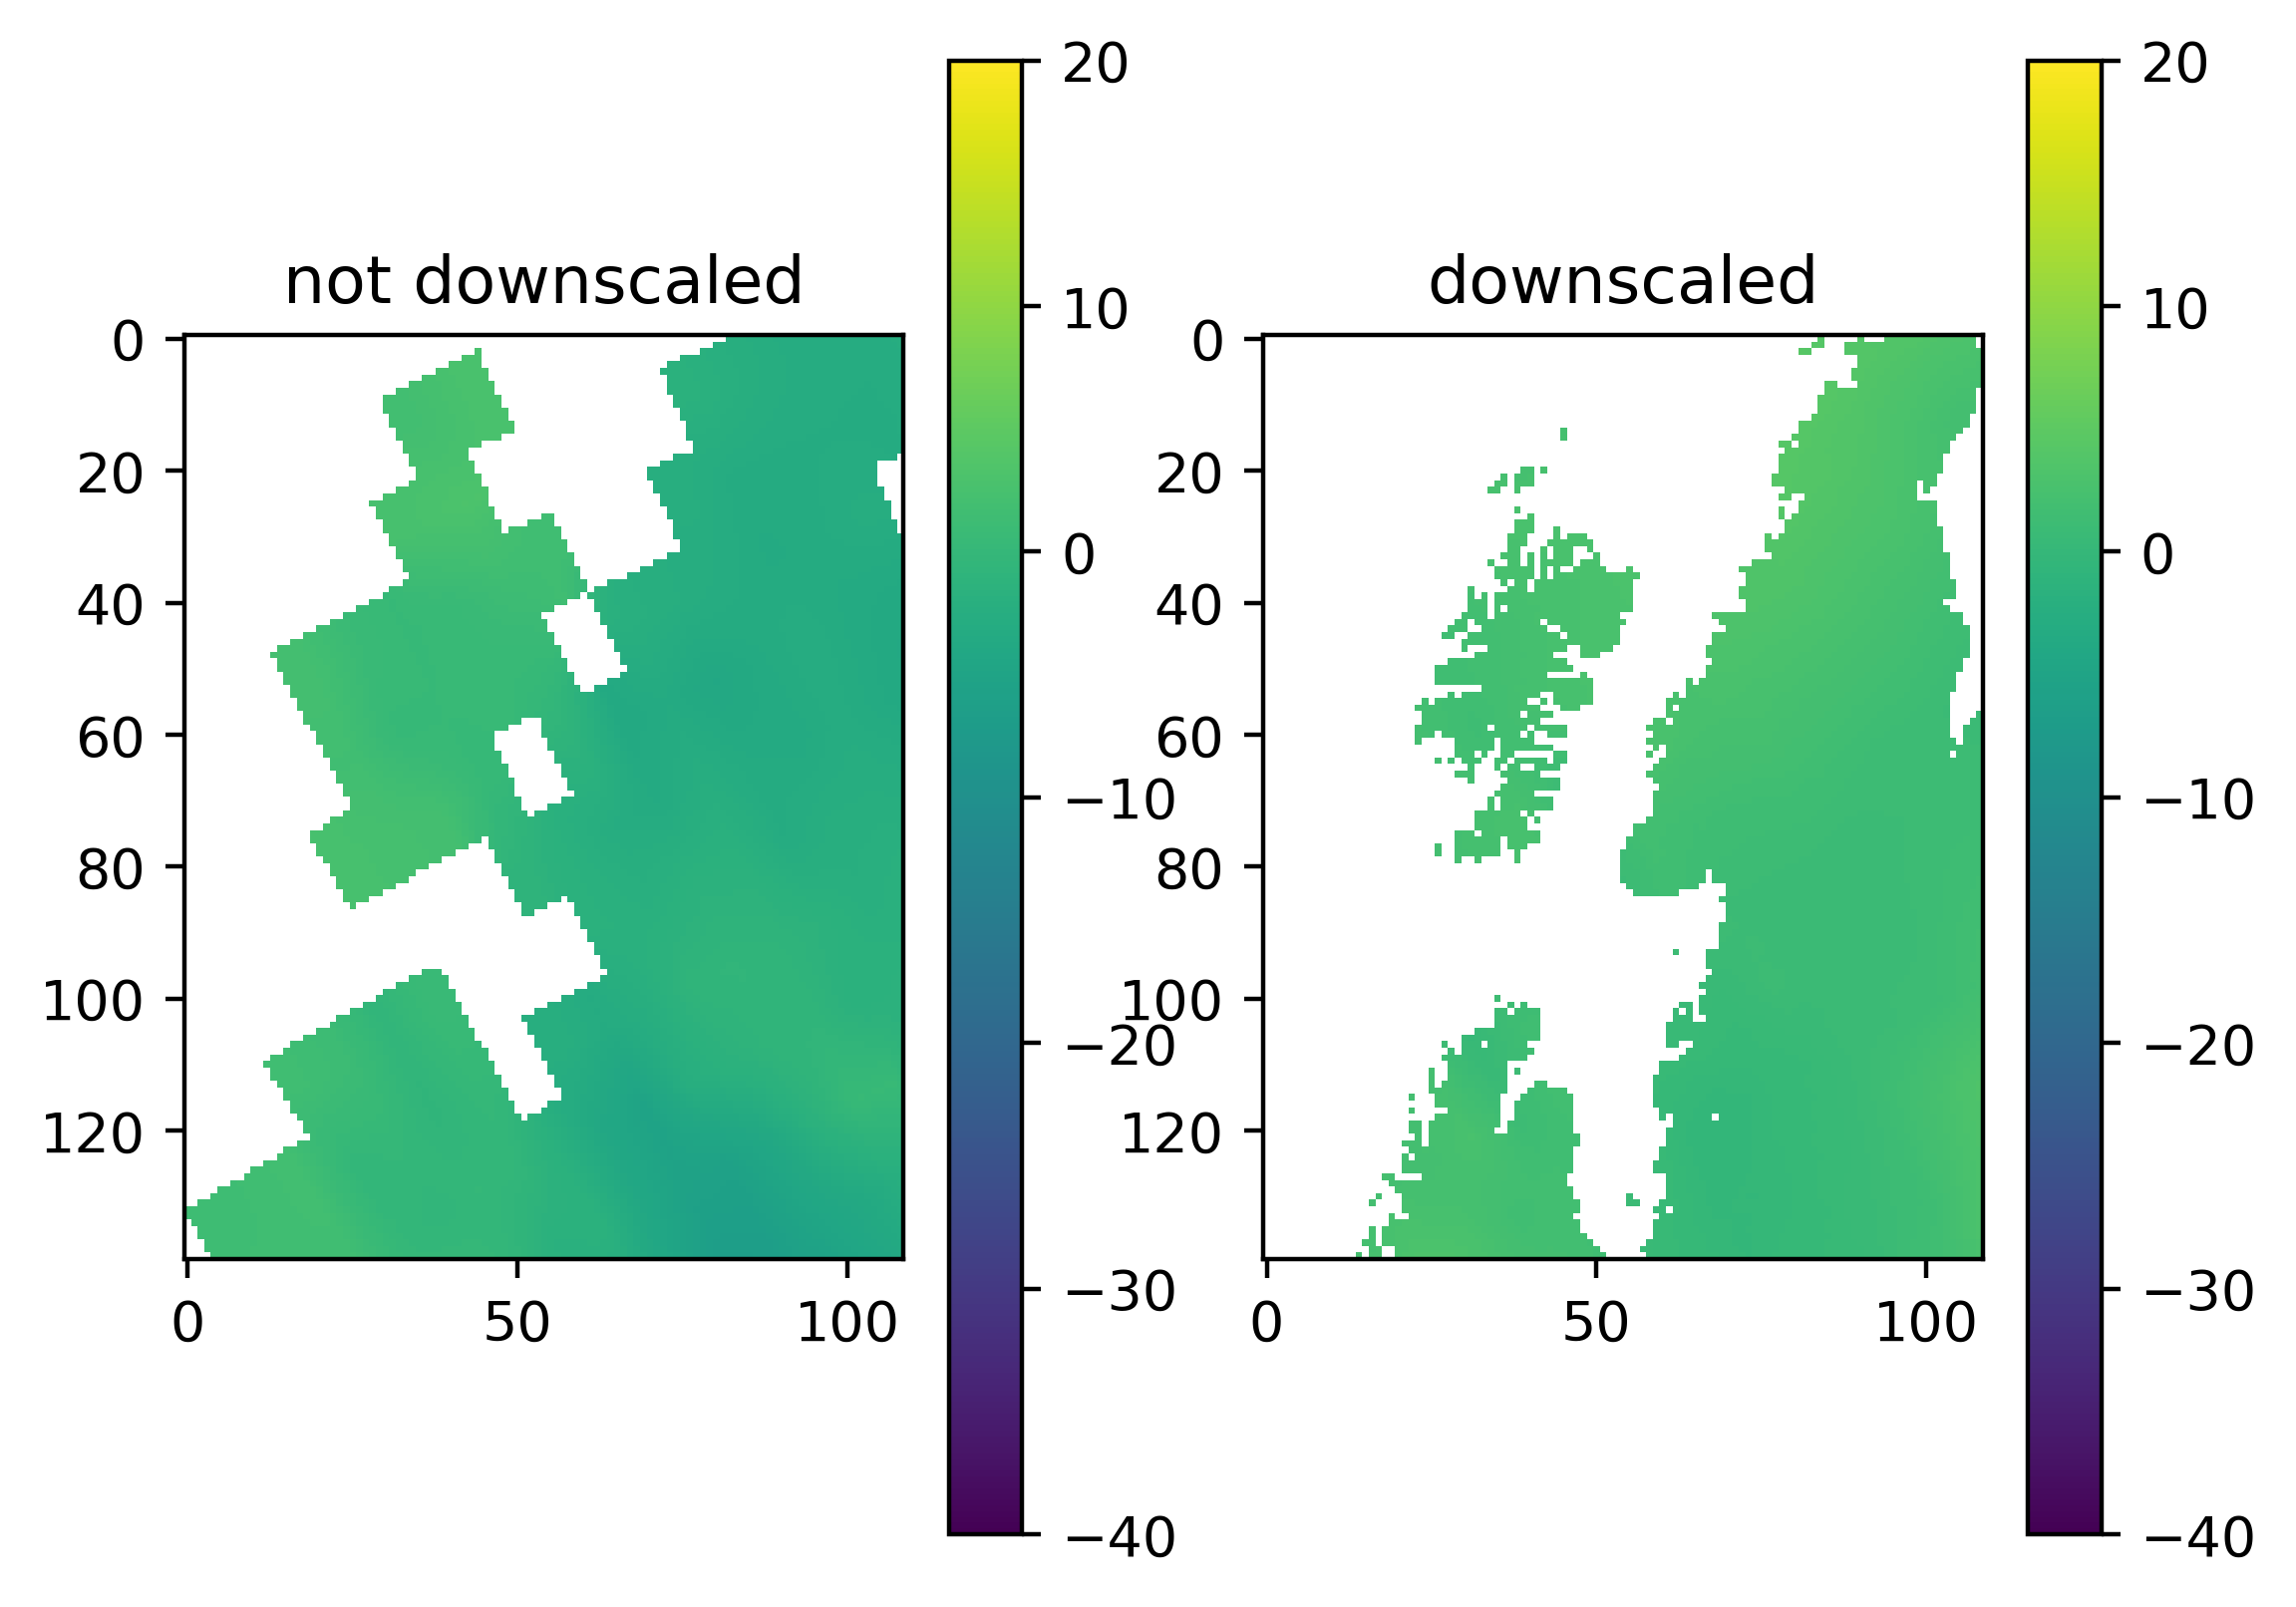

In [34]:
not_downscaled = mytile.data['cru_AnnualTimeSeries'][1970].dataset


fig, axes = plt.subplots(1,2, dpi=400)
axes[0].imshow(not_downscaled['tmax'].data[0] - corrections.ZERO_C_IN_K, vmin=-40, vmax=20)
axes[0].set_title('not downscaled')


im = axes[1].imshow(downscaled_data[1970].dataset['tmax'].data[1], vmin=-40, vmax=20)
axes[1].set_title('downscaled')
fig.colorbar(im, ax=axes[1])
fig.colorbar(im, ax=axes[0])

plt.show()

NameError: name 'correction' is not defined

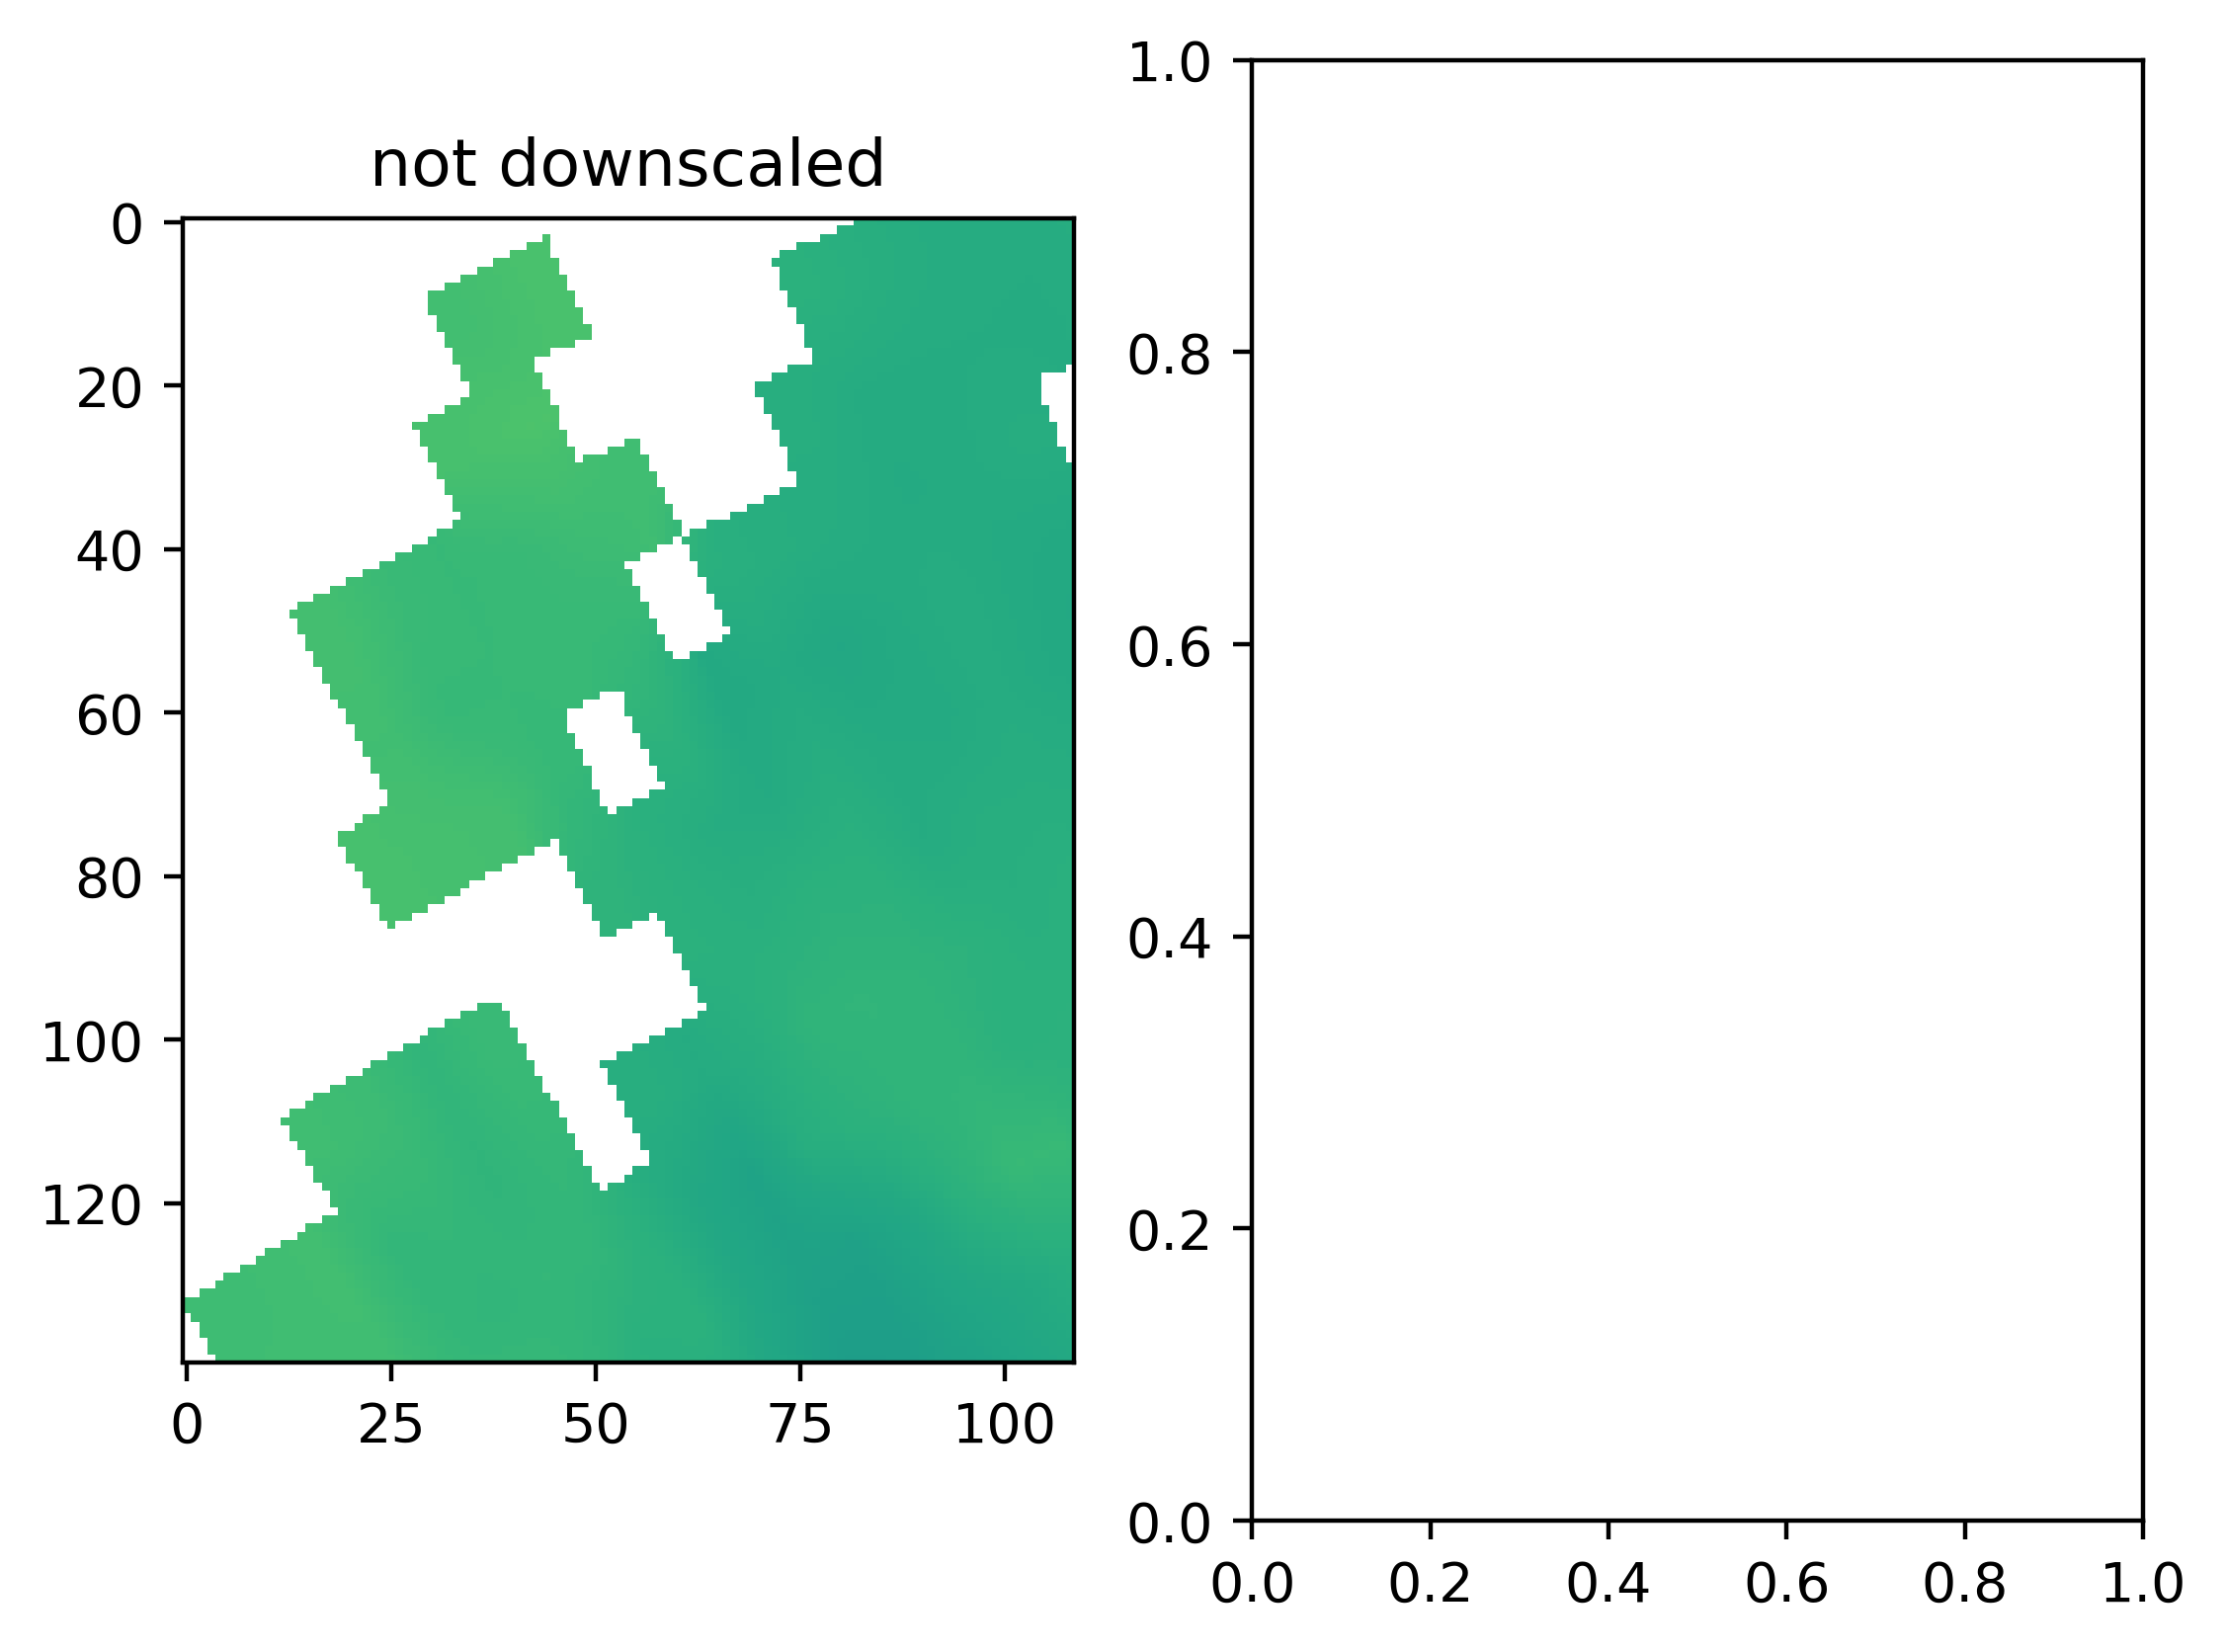

In [35]:
not_downscaled = mytile.data['cru_AnnualTimeSeries'][1970].dataset


fig, axes = plt.subplots(1,2, dpi=400)
axes[0].imshow(not_downscaled['tmax'].data[0] - corrections.ZERO_C_IN_K, vmin=-40, vmax=20)
axes[0].set_title('not downscaled')


im = axes[1].imshow(correction['tmax'].data[0])#, vmin=-40, vmax=20)
axes[1].set_title('correction factor')
fig.colorbar(im, ax=axes[1])
fig.colorbar(im, ax=axes[0])

plt.show()

NameError: name 'correction' is not defined

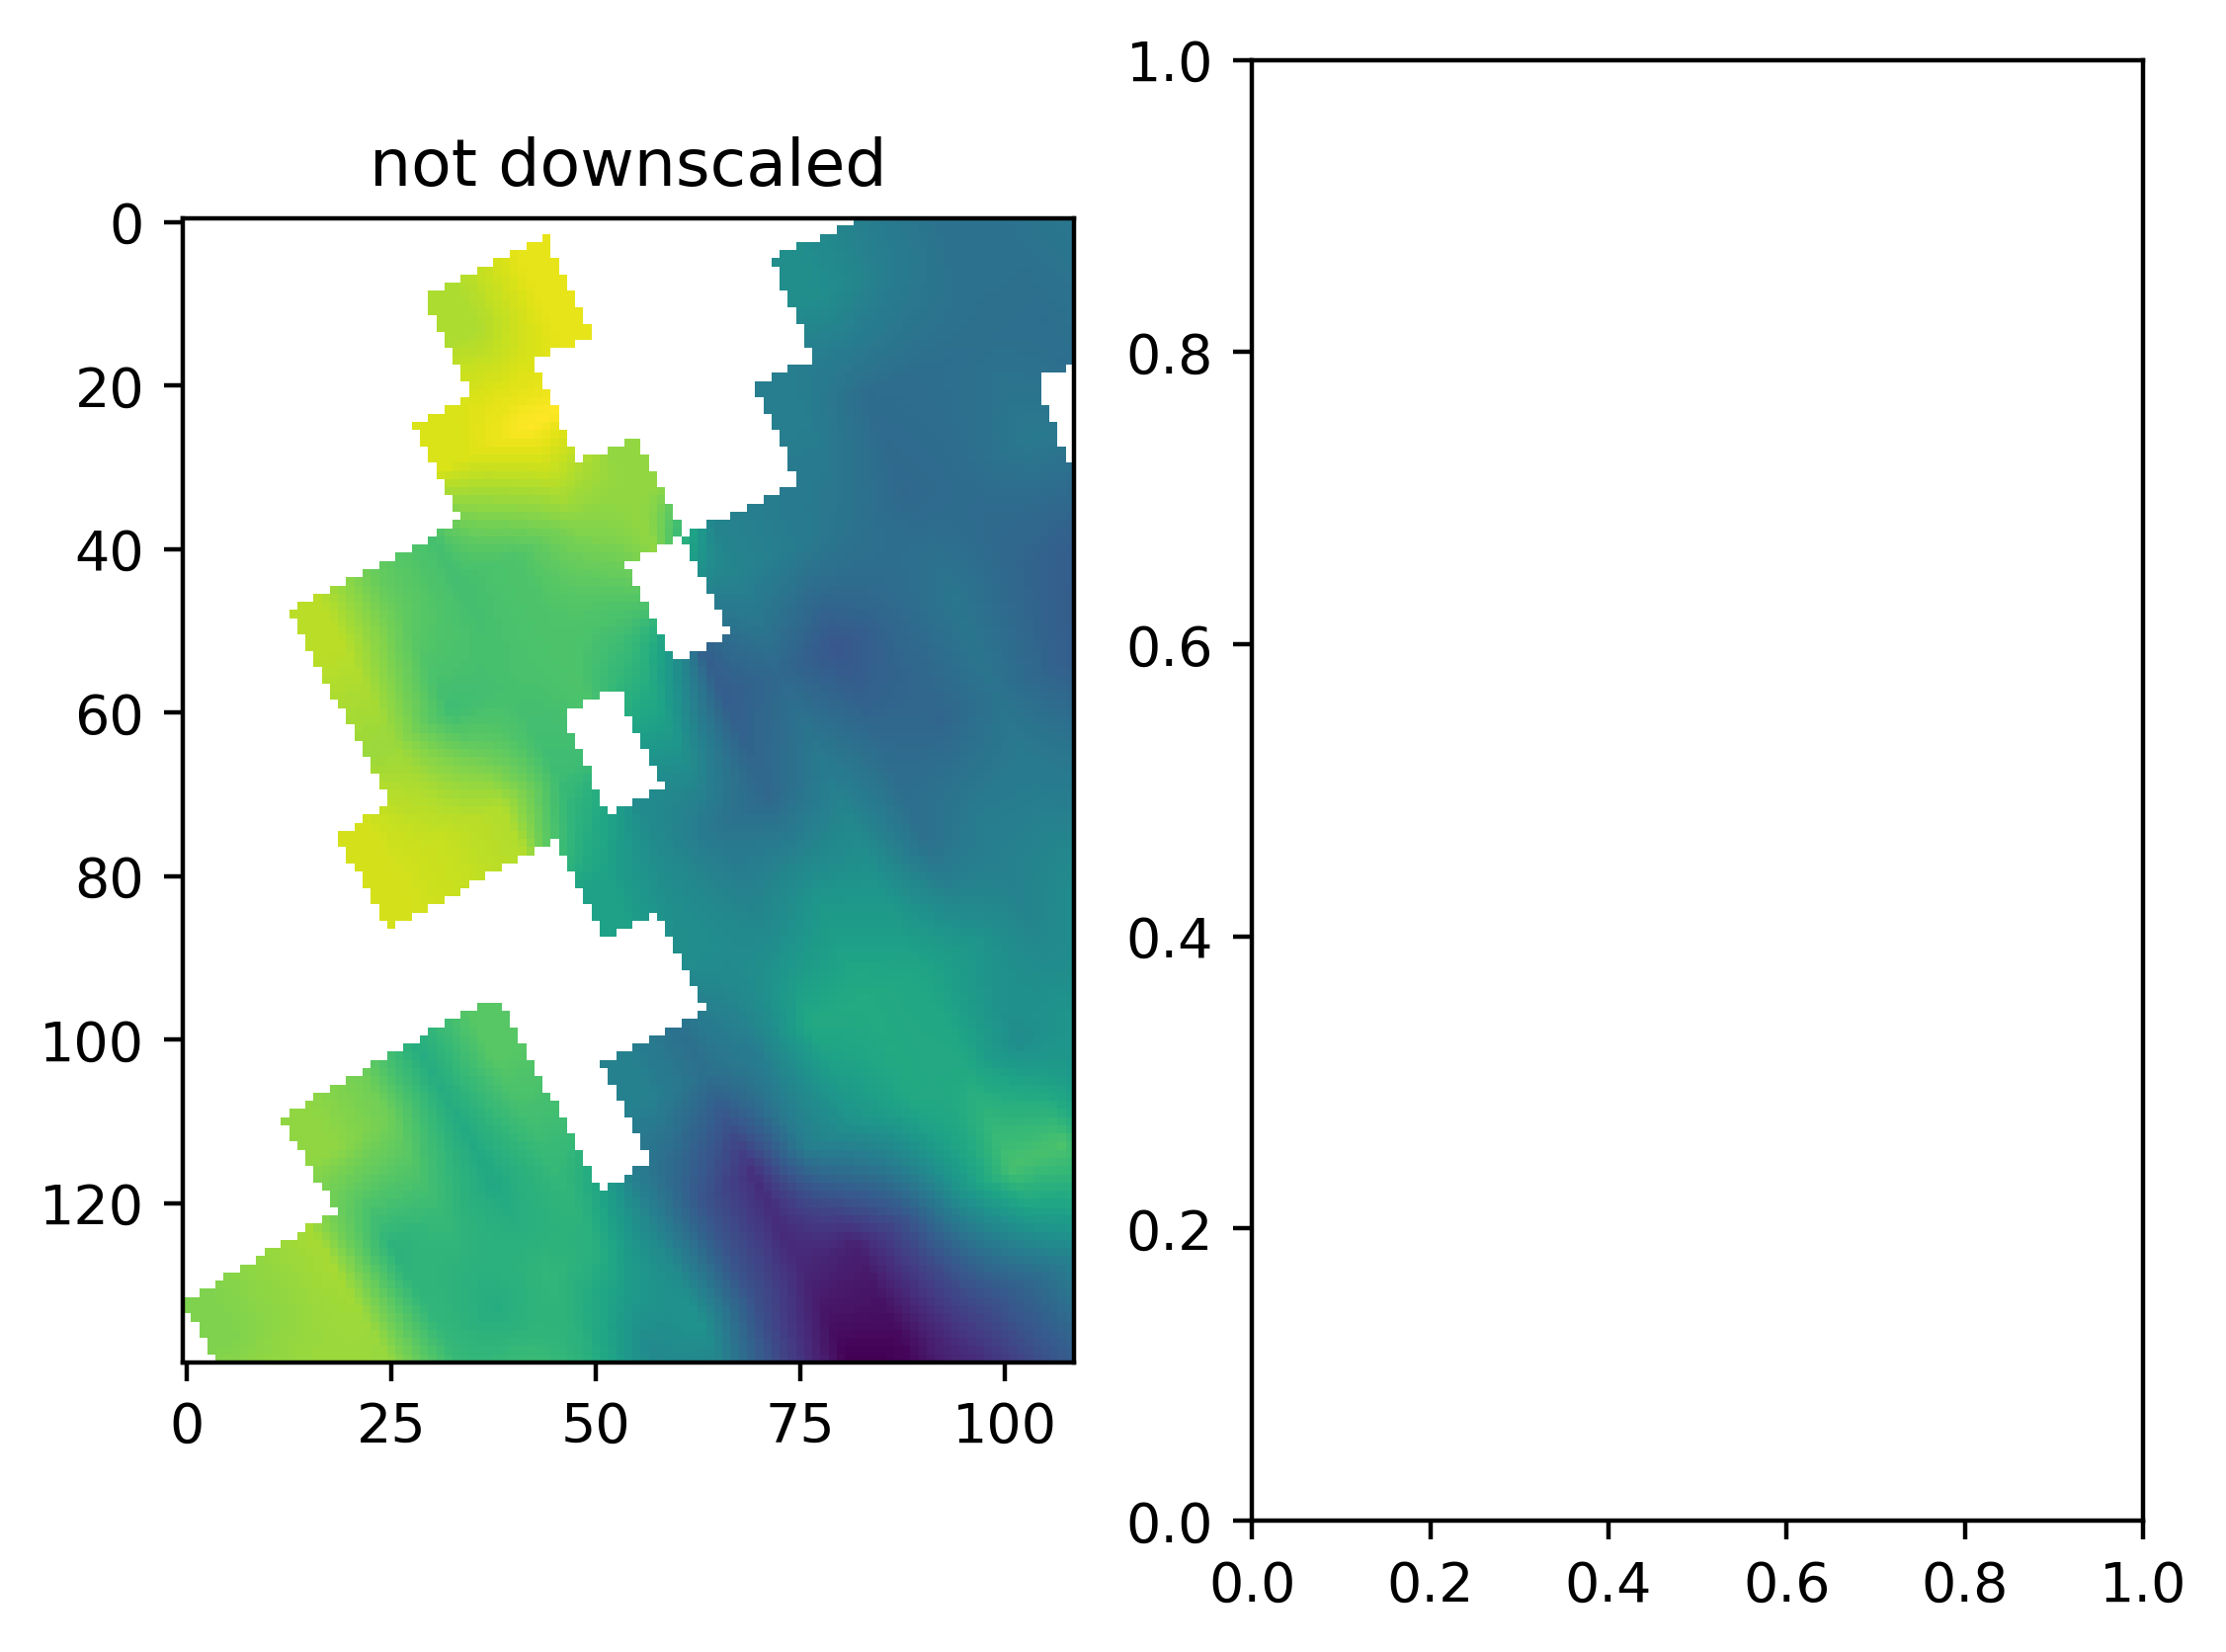

In [34]:
not_downscaled = mytile.data['cru_AnnualTimeSeries'][1970].dataset


fig, axes = plt.subplots(1,2, dpi=400)
im_0 = axes[0].imshow(not_downscaled['tmax'].data[0] - corrections.ZERO_C_IN_K)#, vmin=-40, vmax=20)
axes[0].set_title('not downscaled')


im = axes[1].imshow((not_downscaled['tmax'].data[0] - corrections.ZERO_C_IN_K) + correction['tmax'].data[0])#, vmin=-40, vmax=20)

axes[1].set_title('downscaled')
fig.colorbar(im, ax=axes[1])
fig.colorbar(im_0, ax=axes[0])

plt.show()

In [57]:
correction['tmax'].data[0]

array([[       nan,        nan,        nan, ...,  7.805074 ,  7.6935835,
               nan],
       [       nan,        nan,        nan, ...,  7.737539 ,  7.6274943,
               nan],
       [       nan,        nan,        nan, ...,  7.671028 ,  7.5629926,
         7.4549193],
       ...,
       [       nan,        nan,        nan, ..., 16.516228 , 16.599205 ,
        16.689297 ],
       [       nan,        nan,        nan, ..., 16.56392  , 16.649487 ,
        16.740067 ],
       [       nan,        nan,        nan, ..., 16.618103 , 16.704185 ,
        16.79701  ]], shape=(140, 109), dtype=float32)